In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## Контурный график

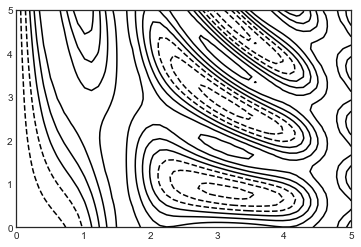

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y, sparse=True)  # sparse сжимает сжимает до вектора матрицу для экономии памяти
Z = f(X, Y)
plt.contour(x, y, Z, colors='black');  # НО тогда нельзя использовать большие X и Y для построения функции(не хватает измерений)
# По умолчанию при использовании одного цвета отрицательные значения рисуются штриховыми линиями

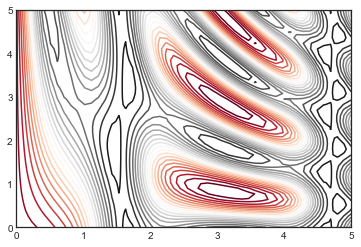

In [3]:
# В данном случае мы указали, что хотим разделить данные на 20 интервалов с равными промежутками.
# А также задали кодировку линий различными цветами с помощью с помощью cmap
plt.contour(x, y, Z, 20, cmap='RdGy'); # Карта цветов - RdGy - сокращенно Red-Gray

In [4]:
# Диапазон карт цветов можно посмотреть с помощью
plt.cm.PRGn  # с помощью TAB

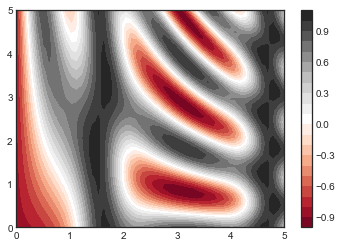

In [5]:
# заполним промежутки между линиями используя на этот раз contour
plt.contourf(x, y, Z, 20, cmap='RdGy')
plt.colorbar();

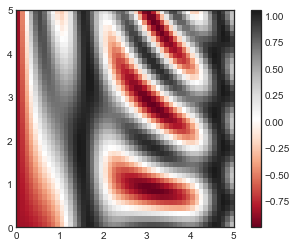

In [6]:
# Чтобы избавиться от пятнистости этого графика нужно задать большее количество контуров,
# но это задача требующая большой производительности.
# Взамен лучше использовать plt.imshow(), интерпретирующий двумерную сетку данных как изображение

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

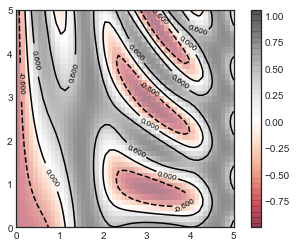

In [7]:
# Можно комбинировать эти графики
contours = plt.contour(x, y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

# plt.contourf(x, y, Z, 20, cmap='RdGy', alpha=0.3)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.5) # с помощью альфа сделали фон более прозрачным
plt.colorbar();

## Гистограммы, разбиние по интервалам и плотность

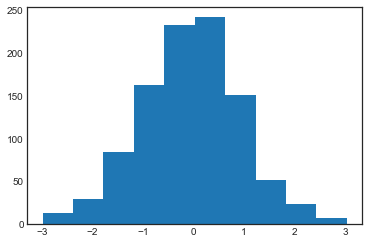

In [8]:
# нарисуем Гисторграмму
data = np.random.randn(1000)

plt.hist(data);

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


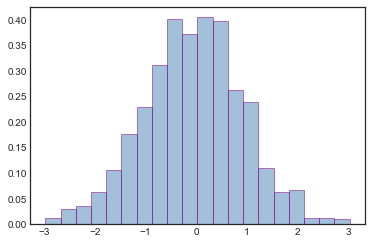

In [9]:
# У функции имеется множество параметров
plt.hist(data, bins=20, normed=True, alpha=0.5, histtype='bar', color='steelblue', edgecolor='purple');

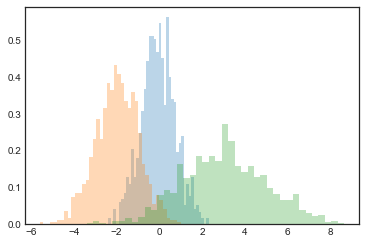

In [10]:
# Сочетание histtype='stepfilled' с прозрачностью alpha
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
# Очень удобно для сравнения гистограмм
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, stacked=True, bins=40)  # normed=True is deprecated(осуждается)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

[ 43 248 475 203  31] [-2.98636773 -1.78218635 -0.57800498  0.6261764   1.83035778  3.03453915]


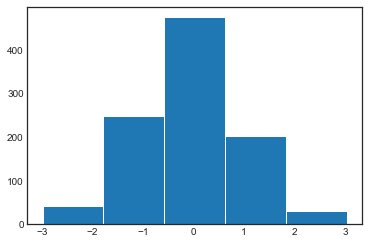

In [11]:
# Если нужно просто вычислить гистограмму(то есть подсчитать количество точек в заданном интервале)
# и не отображать ее то используем np.histogram()
counts, bin_edges = np.histogram(data, bins=5)
print(counts, bin_edges)
plt.hist(data, bins=5, edgecolor='white');

## Двумерные гистограммы

In [12]:
# Опишем массивы данных.
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### Функция plt.hist2d: двумерная гистограмма

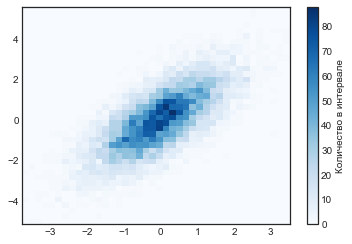

In [13]:
plt.hist2d(x, y, bins=40, cmap='Blues')
cb = plt.colorbar()
cb.set_label('Количество в интервале')
# Также имеется немало дополнительных параметров для тонкой настройки

In [14]:
# Аналогично np.histogram у этой функции есть цифровое видененье
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

### Функция plt.hexbin: гексагональное разбинение по интервалам

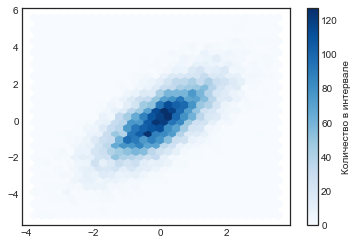

In [15]:
# Разбиение на правильные шестиугольники
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='Количество в интервале')

### Ядерная оценка плотности распределения

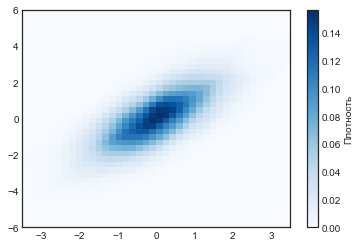

In [16]:
# Можно представить как способ "размазать" точки в пространстве и сложить результаты для получения гладкой функции
from scipy.stats import gaussian_kde

data = np.vstack([x, y])
kde = gaussian_kde(data)

# Выполняем на регулярной координатной сетке
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Выводим график результата в виде изображения
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label('Плотность')

## Пользовательские настроки легенд

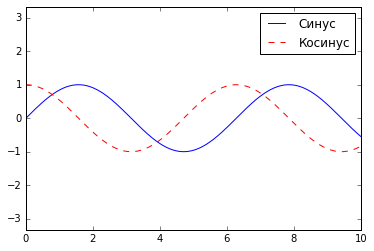

In [17]:
# plt.legend() позволяет автоматически создать простейшую легенду
import matplotlib.pyplot as plt
plt.style.use('classic')

%matplotlib inline
import numpy as np

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Синус')
ax.plot(x, np.cos(x), '--r', label='Косинус')
ax.axis('equal')
leg = ax.legend();

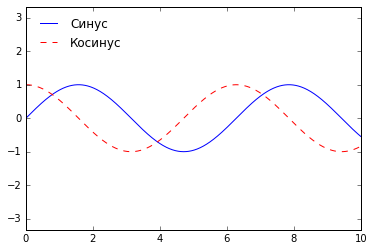

In [18]:
# Существует множество вариантов пользовательских настроек легенды
ax.legend(loc='upper left', frameon=False) # Например убираем рамку и сдвигаем легенду в правый верхний угол
fig

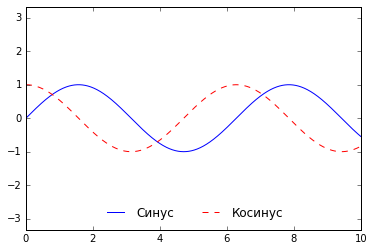

In [19]:
# Можно также с помощью команды ncol задать кол-во столбцов в легенде
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

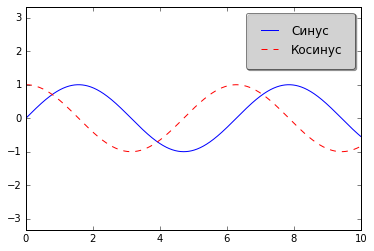

In [20]:
# можно сделать закругленные рамки(fancybox), добавить тень(shadow) и прозрачность рамки(framealpha) 
ax.legend(fancybox=True, framealpha=0.5, shadow=True, borderpad=1)
fig

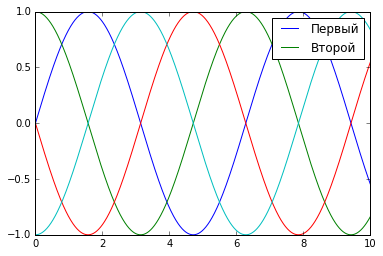

In [21]:
# Если нужно чтобы в легенду попала только часть элементов графика, то можно указать какие
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)  # в этот момент рисует график

# lines представляет собой список экземпляр класса plt.Line2D
plt.legend(lines[:2], ['Первый', 'Второй']); 

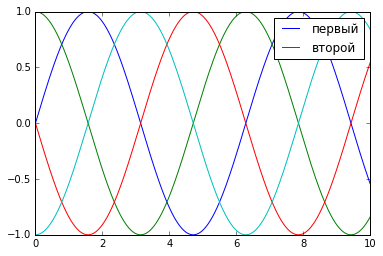

In [22]:
# Обычно на практике бывает удобнее указывать метки непосредственно для элементов,
# которые нужно указывать в легенде.
plt.plot(x, y[:, 0], label='первый')
plt.plot(x, y[:, 1], label='второй')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);
# По умолчанию в легенде игнорируются все элементы, где не установлен label

In [23]:
import pandas as pd

In [24]:
lon_lat_ord = pd.read_excel('Долгота-Ширина Антор.xls')

WARNING *** file size (5776118) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


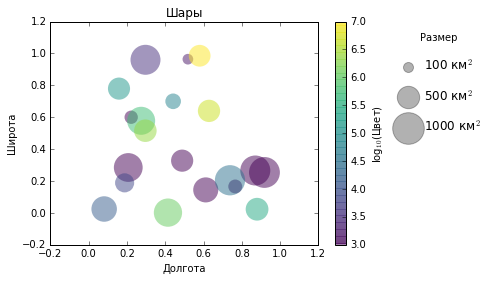

In [25]:
rng = np.random.RandomState(5)
x = rng.rand(20)
y = rng.rand(20)
vol = rng.randint(100, 1000, 20)
col = np.linspace(1, 7, 20)


plt.scatter(x, y, label=None, c=col, cmap='viridis', s=vol, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.colorbar(label='log$_{10}$(Цвет)')
plt.clim(3, 7)  # Границы схемы цвета

# Создаем легенду
# выводим на график пустые списки с нужным размером и меткой
for vol in [100, 500, 1000]:
    plt.scatter([], [], c='k', alpha=0.3, s=vol, label=str(vol)+' км$^2$')  # Понравился просто значок квадрадных км.)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1.3,
           handletextpad=0.3, title='Размер', bbox_to_anchor=(1.25, 1.),  loc=2) # и теперь подходящая легенда у нас есть

plt.title('Шары');


#### Отображение нескольких легенд

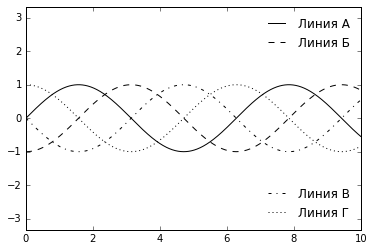

In [26]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')

ax.axis('equal')

# Задаем линии и метки первой легенды
ax.legend(lines[:2], ["Линия А", "Линия Б"], loc='upper right', frameon=False)

# Создаем вторую легенду и добавляем рисователь вручную
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['Линия В', "Линия Г"], loc='lower right', frameon=False)
ax.add_artist(leg);  # Немного другой вариант использования некольких лешгенд в файле данных по РСД Matplotlib 

### Пользовательские насткройки шкал цветов

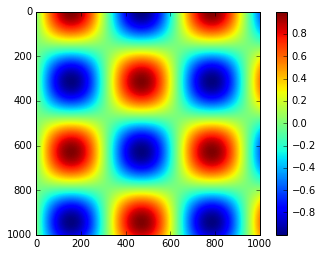

In [27]:
# Создаем простейшие шкалы цветов
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

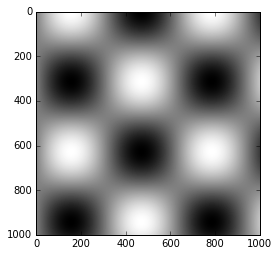

In [28]:
plt.imshow(I, cmap='gray'); # Доступные карты цветов опять же можно просматривать plt.cm. с помощью Tab

In [29]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Возвращает версию в оттенках серого заданной карты цветов"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # Преобразуем RGBA в воспринимаемую глазом светимость серого цвета
    # cp. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
    """Рисует карту цветов в эквивалентных оттенках серого"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])
    

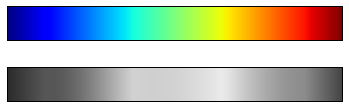

In [30]:
# jet - пример качественной карты цветов, плохо подходит для отображения количественных данных.
# Обычно они не отражают равномерного раста яркости при продвижении по шкале
view_colormap('jet')
# Заметны яркие полосы в ахроматическом изображении - определенные части диапазона цветов будут притягивать внимание

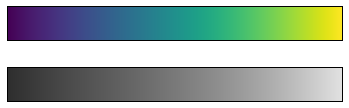

In [31]:
# Лучше применять такие наборы как viridis(используется по умолчанию начиная с Matplotlib 2.0)
# Его равномерное распределение яркости согласуется с нашим цветовым восприятием 
# и также лучше преобразуется для печати в оттенках серого
view_colormap('viridis')

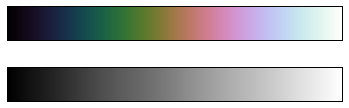

In [32]:
# Если в предпочтении радужные цвета, то можно использовать непрерывную цветовую схему
view_colormap('cubehelix')

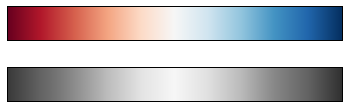

In [33]:
# Для отображения положительных и отприцательных отклонений от среднего удобно использовать двуцветные карты
# Но при переходе к оттенкам серого информация будет потеряна
view_colormap('RdBu')

#### Ограничения и расширенные возможности по использованию цветов

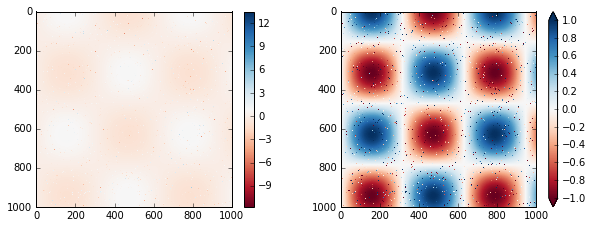

In [34]:
# Создаем данные с шумом 1% от пикселов
speckles = (np.random.random(I.shape) < 0.01)     # очень странно выделил 1% данных
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))  # и зашумил его

plt.figure(figsize=(10, 3.5))  
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

# График с суженным диапазоном границ цветов
plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

#### Дискретные шкалы цветов

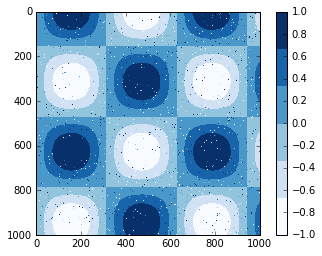

In [35]:
# Карты цветов по умолчанию непрерывны, но иногда нужно обеспечить отражение дискретных значений.
# Простейший способ добиться этого - воспользоваться функцией plt.cm.get_cmap()
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

## Пример рукописные цифры

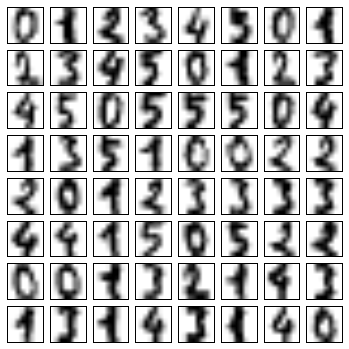

In [36]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

(1083, 2)


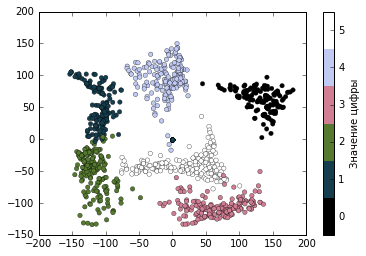

In [37]:
# Рассмотрим отображение с помощью обучения на базе многообразий наших данных на двумерное пространство
# Отображение данных с цифрами на двумерное пространство с помощью функции IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

print(projection.shape)

# Выводим резултат на график пользуясь дискретной картой цветов
plt.scatter(projection[:, 0], projection[:, 1], lw=0.3,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='Значение цифры')
# Задаем ограничения с лагом
plt.clim(-0.5, 5.5)

### Множественные субграфики

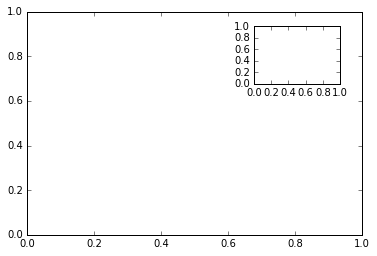

In [38]:
# Создание субграфиков вручную с помощью plt.axes
ax1 = plt.axes()  # обычные оси координат
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])   # местоположение внутреннего графика
# [координаты (X,  Y) левого нижнего угла, ширина, высота] все в процентах от основного рисунка


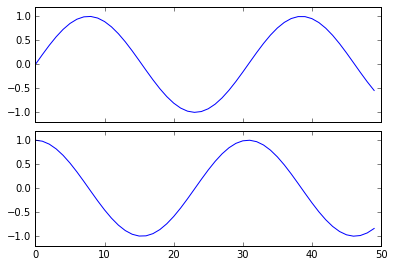

In [39]:
# Аналог этой функции в объектно-ориентированном интерфейсе - функция fig.add_axes()
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.53, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2)) # Убираем деления по x на верхней системе координат
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

### plt.subplot: Простые сетки субграфиков

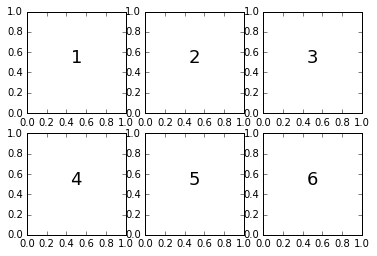

In [40]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((i)), fontsize=18, ha='center')

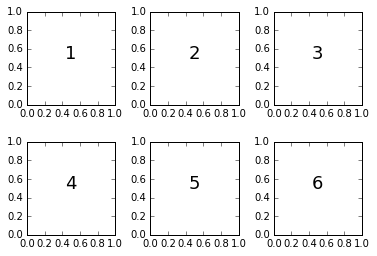

In [41]:
# Для настройки размеров полей между графиками используем команду plt.subplots_adjust
# Используем такую же, но объектно-ориентированную команду fig.add_subplot()
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Высота и ширина
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((i)), fontsize=18, ha='center')

### Функция plt.subplots: создание всей сетки за один раз

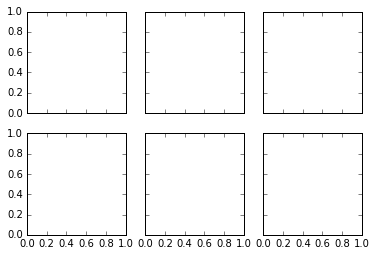

In [42]:
# более простой способ использовать функцию plt.subplotS
# которая создает сетку субграфиков одной строкой кода
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row') 
# sharex, sharey позволяют задавать связи между различными системами координат
# при их использовании автоматически удаляются внутренние метки

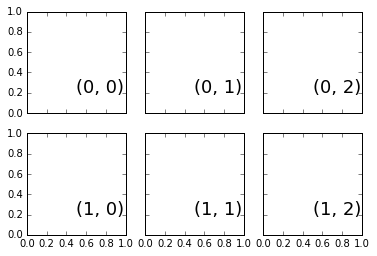

In [43]:
# Системы координат располагаются в двумерном массиве, индексируемом по [строка, столбец]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.2, str((i, j)), fontsize=18, ha='left')
        
fig   # plt.subplots намного больше похожа на индексацию python

### plt.GridSpec: более сложные конфигурации

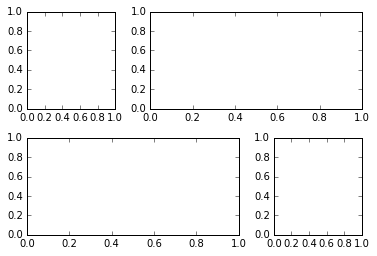

In [44]:
# plt.GridSpec просто удобный интефейс понятный функции plt.subplot()
# Например создаем сетку два на три
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
# местоположение задаем с помощью обычных срезов языка python
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

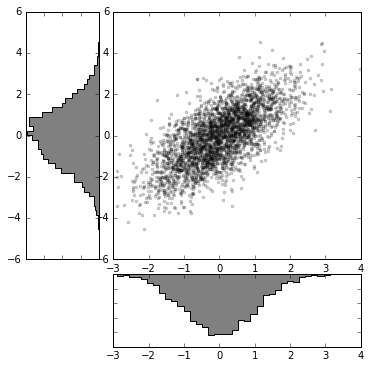

In [45]:
# Подобное выравнивание сетки находит множество различных приминений

# Создаме нормально распределенные данные 
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Задаем системы координат с помощью функции GridSpec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# распределяем точки по системе координат
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# рисуем гистограммы на дополнительных системах координат
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()
# Такой график настолько распространен, что в Seaborn есть отдельное API для него

## Текст и поясняющие надписи

In [46]:
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [47]:
births = pd.read_csv('births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

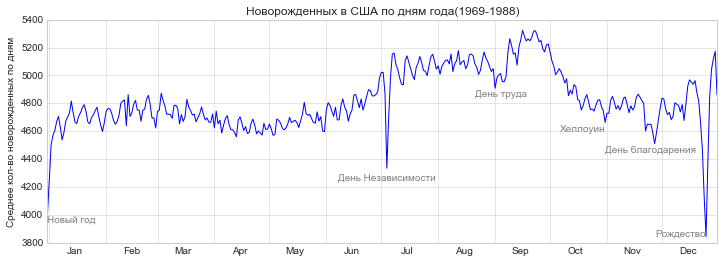

In [48]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax, legend=False)

style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, 'Новый год', **style)
ax.text('2012-7-4', 4250, 'День Независимости', ha='center', **style)
ax.text('2012-9-4', 4850, 'День труда', ha='center', **style)
ax.text('2012-10-31', 4600, 'Хеллоуин', ha='right', **style)
ax.text('2012-11-25', 4450, 'День благодарения', ha='center', **style)
ax.text('2012-12-25', 3850, 'Рождество', ha='right', **style)

ax.set(title='Новорожденных в США по дням года(1969-1988)', ylabel='Среднее кол-во новорожденных по дням')

# Размечаем ось X центрированными метками для месяцев
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

### Преобразования и координаты текста

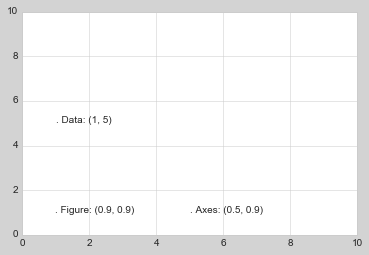

In [49]:
# В предыдущем примере мы привязывали наши текстовые данные к конкретным значениям данных. 
# Иногда бывает удобнее привязать текст к координатам на осях рисунка.
# Существует три предопределенных преобразования:
# ax.transData - преобразования из системы координат
# ax.transAxes - преобразования из системы координат объекта Axes(в единицах размера рисунка)
# fig.transFigure - преобразования из системы координат объекта Figure(в единицах размера рисунка)

# пример вывода текста на рисунок с помощью этих преобразований
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData - значение по умолчанию
# но мы все равно указываем его
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.9)", transform=ax.transAxes) # Процент от графика
ax.text(0.2, 0.2, ". Figure: (0.9, 0.9)", transform=fig.transFigure); # от левого нижнего угла рисунка

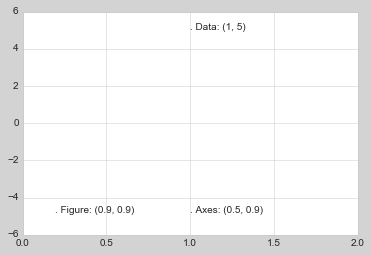

In [50]:
# Если поменять пределы координат, то это повлияет только на transData, а другие не изменятся
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

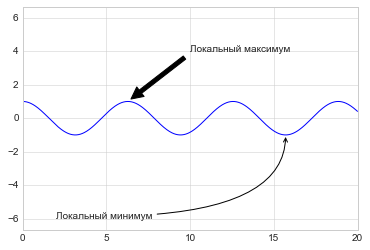

In [51]:
# Рисование стрелок иногда оказывается более сложной задачей
# Существует функция plt.arrow(), но лучше ее не использовать,
# т.к. стрелки будут изменяться при изменении соотношения сторон графиков
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('Локальный максимум', xy=(6.28, 1), xytext=(10, 4), arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('Локальный минимум', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle='->', connectionstyle='angle3,angleA=0,angleB=-90')); 
# arrowprops позводляет управлять стилем

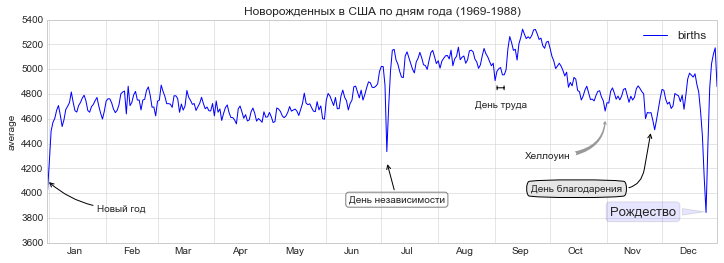

In [52]:
# параметры словаря стиля(arrowprops) отлично описаны в matplotlib
# поэтому просто продемонстрируем некоторые возможности
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Добавляеи на график метки
ax.annotate('Новый год', xy=('2012-1-1', 4100), xycoords='data', xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'))

ax.annotate('День независимости', xy=('2012-7-4', 4250), xycoords='data',
            bbox=dict(boxstyle='round', fc='none', ec='gray'),
            xytext=(10, -40), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle='->'))

ax.annotate('День труда', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', 
            xy=('2012-9-1', 4850), 
            xytext=('2012-9-7', 4850), 
            xycoords='data', 
            textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Хеллоуин', xy=('2012-10-31', 4600), xycoords='data', xytext=(-80, -40), textcoords='offset points', 
            arrowprops=dict(arrowstyle='fancy', fc="0.6", ec='none', connectionstyle='angle3,angleA=0,angleB=-90'))

ax.annotate('День благодарения', xy=('2012-11-25', 4500), xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle='round4,pad=.5', fc='0.9'),
            arrowprops=dict(arrowstyle='->', connectionstyle='angle,angleA=0,angleB=80,rad=20'))

ax.annotate('Рождество', xy=('2012-12-25', 3850), xycoords='data', xytext=(-30, 0), textcoords='offset points',
            size=13, ha='right', va='center',
            bbox=dict(boxstyle='round', alpha=0.1),
            arrowprops=dict(arrowstyle='wedge, tail_width=0.5', alpha=0.1));

# Задаем метки для осей координат
ax.set(title='Новорожденных в США по дням года (1969-1988)', ylabel='average')
       
# Размещаем ось X центрированными метками для месяцев
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
       
ax.set_ylim(3600, 5400);